# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
website_address = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(website_address)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_temp_table = soup.find('table', class_='table')
mars_temp_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
temp_columns_headers_list = []
temp_table_list = []
temp_table_dict = {}

# create list of column headers
column_headers = mars_temp_table.find_all('th')
for header in column_headers:
    temp_columns_headers_list.append(header.text)

temp_columns_headers_list
number_of_columns = len(temp_columns_headers_list)
print(number_of_columns)

row_values = mars_temp_table.find_all('tr', class_='data-row')
for row in row_values:
    values = row.find_all('td')
    row_data = []
    for column in range(number_of_columns):
        value_f = values[column].text
        row_data.append(value_f)
    temp_table_list.append(row_data)

temp_table_list

7


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_table_df = pd.DataFrame(temp_table_list, columns=temp_columns_headers_list)

In [9]:
# Confirm DataFrame was created successfully
mars_temp_table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
mars_temp_table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
mars_temp_table_df = mars_temp_table_df.astype({'sol': 'int64', 'ls' : 'int64', 'month' : 'int64', 'min_temp' : float, 'pressure' : float})
mars_temp_table_df['terrestrial_date'] = pd.to_datetime(mars_temp_table_df['terrestrial_date'])

In [12]:
# Confirm type changes were successful by examining data types again
mars_temp_table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months = mars_temp_table_df["month"].unique()
months_on_mars = list(months)
months_on_mars.sort()
months_on_mars
number_of_months_on_mars = len(months_on_mars)
print(f"Number of Months on Mars: {number_of_months_on_mars } Months")

number_of_days_in_each_month = mars_temp_table_df['month'].value_counts()
number_of_days_in_each_month_sorted = number_of_days_in_each_month.sort_index()
number_of_days_in_each_month_sorted

Number of Months on Mars: 12 Months


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there
total_number_of_martian_days = number_of_days_in_each_month_sorted.sum()
total_number_of_martian_days

1867

In [15]:
# 3. What is the average low temperature by month?
lowest_temp_in_each_month = mars_temp_table_df.groupby(['month'])['min_temp'].mean()
lowest_temp_in_each_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(35.347222222222214, 0.5, 'Temperature in Celsius')

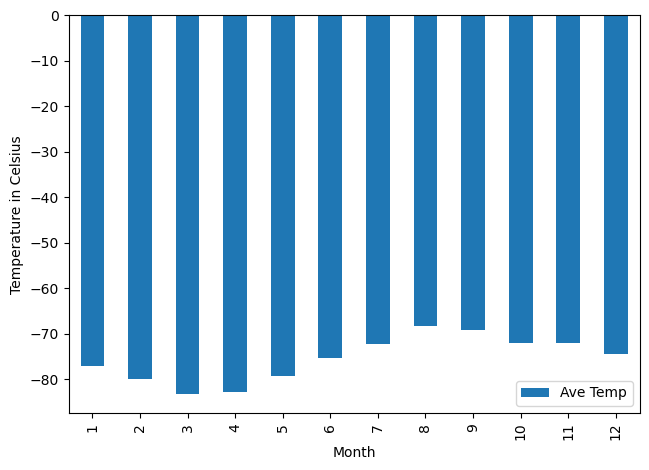

In [16]:
# Plot the average temperature by month
data_frame_to_create_bar_chart = pd.DataFrame({'Ave Temp':lowest_temp_in_each_month})
data_frame_to_create_bar_chart
figure_1 = data_frame_to_create_bar_chart.plot(kind='bar', align="center")
plt.tight_layout()
figure_1.set_xlabel('Month')
figure_1.set_ylabel('Temperature in Celsius')

In [17]:
# Identify the coldest and hottest months in Curiosity's location
temp_in_each_month_sorted = lowest_temp_in_each_month.sort_values()
temp_in_each_month_sorted

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

Text(35.347222222222214, 0.5, 'Temperature in Celsius')

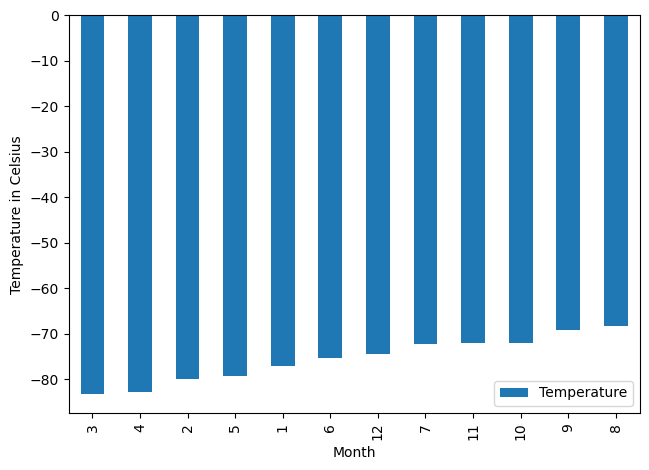

In [18]:
# Identify the coldest and hottest months in Curiosity's location
data_frame_to_create_bar_chart = pd.DataFrame({'Temperature':temp_in_each_month_sorted})
data_frame_to_create_bar_chart
figure_1 = data_frame_to_create_bar_chart.plot(kind='bar', align="center")
plt.tight_layout()
figure_1.set_xlabel('Month')
figure_1.set_ylabel('Temperature in Celsius')

In [19]:
# 4. Average pressure by Martian month
average_pressure_in_each_month = mars_temp_table_df.groupby(['month'])['pressure'].mean()
average_pressure_in_each_month
average_pressure_in_each_month_sorted = average_pressure_in_each_month.sort_values()
average_pressure_in_each_month_sorted

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

Text(38.097222222222214, 0.5, 'Atmospheric Pressure')

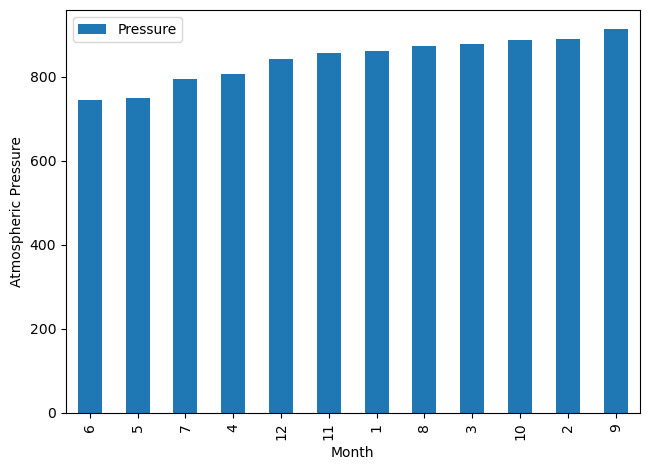

In [19]:
# Plot the average pressure by month
data_frame_to_create_bar_chart = pd.DataFrame({'Pressure':average_pressure_in_each_month_sorted})
data_frame_to_create_bar_chart
figure_1 = data_frame_to_create_bar_chart.plot(kind='bar', align="center")
plt.tight_layout()
figure_1.set_xlabel('Month')
figure_1.set_ylabel('Atmospheric Pressure')

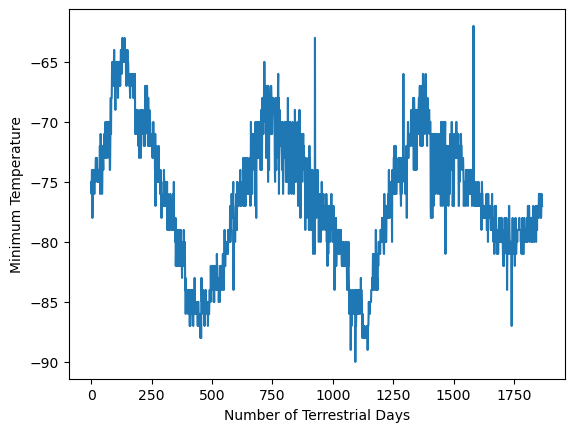

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Since the terrestrial_date are given in a dialy increments, the index in the DataFrame (temp_table_df) can be used to reflect 
# the number of terrestrial days

plt.plot(mars_temp_table_df.index, mars_temp_table_df["min_temp"])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

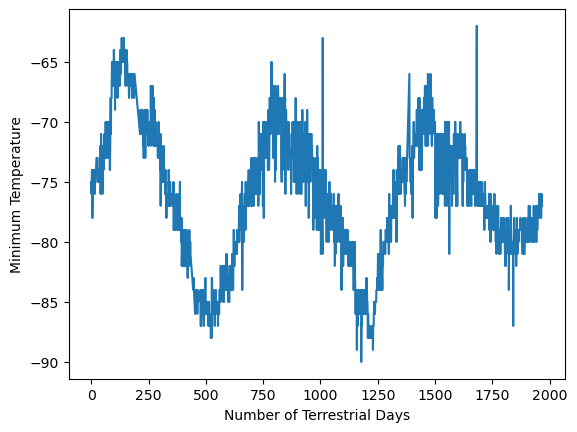

In [21]:
# If the above is not acceptabl, we could calculate the difference between any date and the first date in days as following

number_of_days_cummulative = []

number_of_rows_dataframe = len(mars_temp_table_df)
for i in range(number_of_rows_dataframe):
    date_diff_in_days = (mars_temp_table_df.iloc[i, 2]) - (mars_temp_table_df.iloc[0, 2])
    number_of_days_cummulative.append(date_diff_in_days)

number_of_days_cummulative

# create the plot using the list of "number_of_days_cummulative" and the column "min_temp" in the dataframe
plt.plot(number_of_days_cummulative, mars_temp_table_df["min_temp"])
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature")
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_temp_table_df.to_csv("Mars_Data", index=False)

In [23]:
browser.quit()